# 🐍 ML-Powered Snake Game Analytics

This notebook analyzes gameplay data from a Snake game using Python and Machine Learning.

In [ ]:
# 📥 Step 1: Upload & Load Data
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving snake_game_dataset (1).csv to snake_game_dataset (1).csv


,Player_ID,Score,High_Score,Game_Duration,Snake_Speed,Hit_Border
0,P001,98,180,223,4,1
1,P002,203,377,90,5,0
2,P003,407,530,153,8,0
3,P004,248,252,277,7,0
4,P005,119,275,171,5,0


In [ ]:
# 📊 Step 2: Data Overview
print("Summary Statistics:\n")
print(df.describe())

print("\nNull Values:\n")
print(df.isnull().sum())

Summary Statistics:

            Score  High_Score  Game_Duration  Snake_Speed  Hit_Border
count   50.000000   50.000000      50.000000    50.000000   50.000000
mean   254.100000  348.180000     162.620000     6.800000    0.360000
std    127.457116  137.485538      61.860571     2.185294    0.484873
min     70.000000   98.000000      62.000000     3.000000    0.000000
25%    134.750000  248.250000     114.000000     5.000000    0.000000
50%    242.500000  321.000000     159.500000     7.000000    0.000000
75%    356.250000  477.000000     209.000000     9.000000    1.000000
max    485.000000  625.000000     294.000000    10.000000    1.000000

Null Values:

Player_ID        0
Score            0
High_Score       0
Game_Duration    0
Snake_Speed      0
Hit_Border       0
dtype: int64


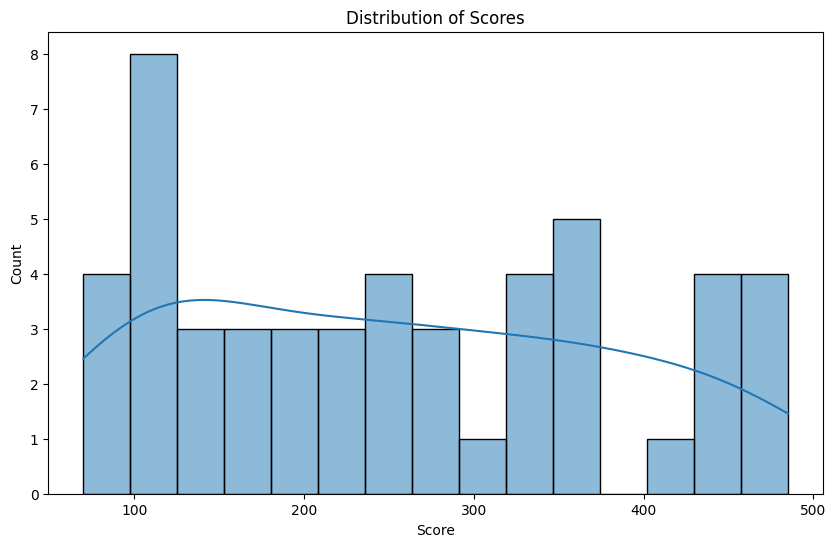

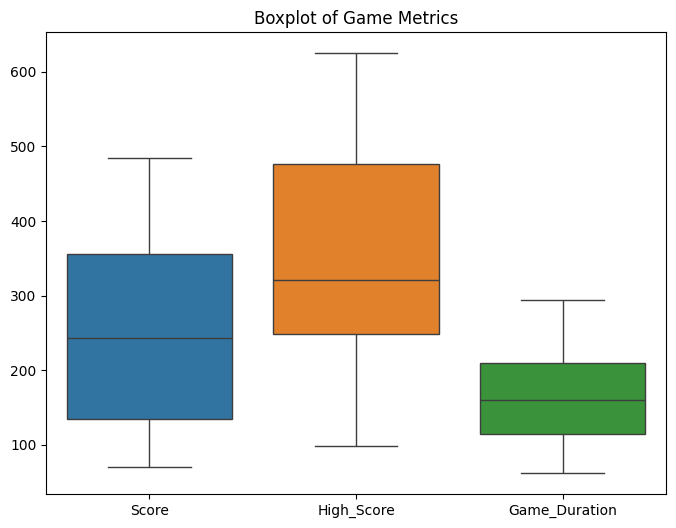

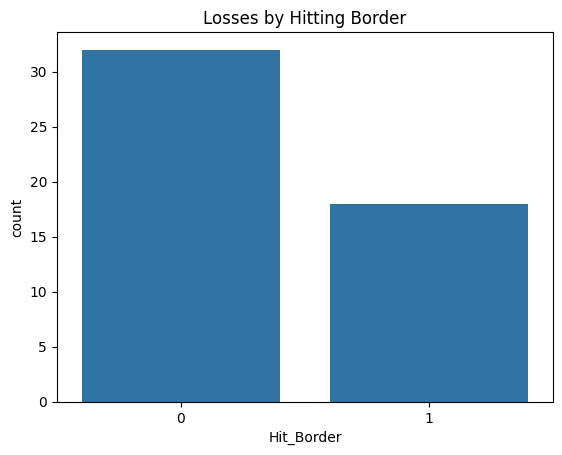

In [ ]:
# 📈 Step 3: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=15, kde=True)
plt.title("Distribution of Scores")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Score', 'High_Score', 'Game_Duration']])
plt.title("Boxplot of Game Metrics")
plt.show()

sns.countplot(data=df, x='Hit_Border')
plt.title("Losses by Hitting Border")
plt.show()

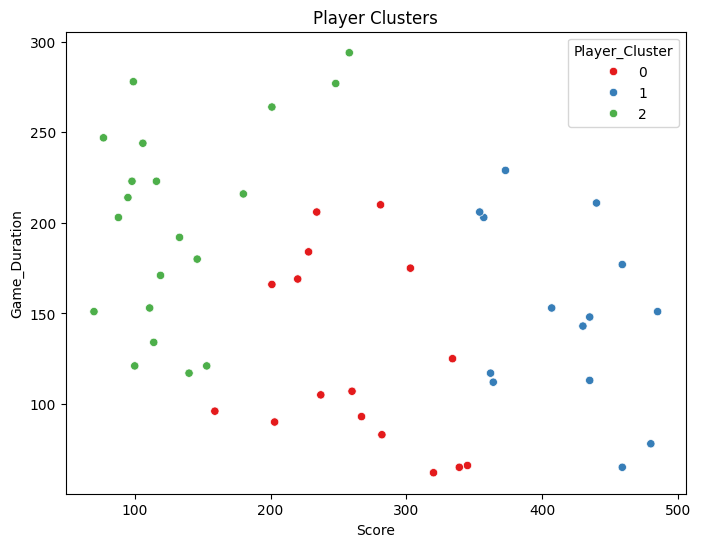

In [ ]:
# 🧠 Step 4: K-Means Clustering
from sklearn.cluster import KMeans

X = df[['Score', 'Game_Duration', 'Snake_Speed']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Player_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Score', y='Game_Duration', hue='Player_Cluster', palette='Set1')
plt.title("Player Clusters")
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.00      0.00      0.00         4

    accuracy                           0.40        10
   macro avg       0.25      0.33      0.29        10
weighted avg       0.30      0.40      0.34        10



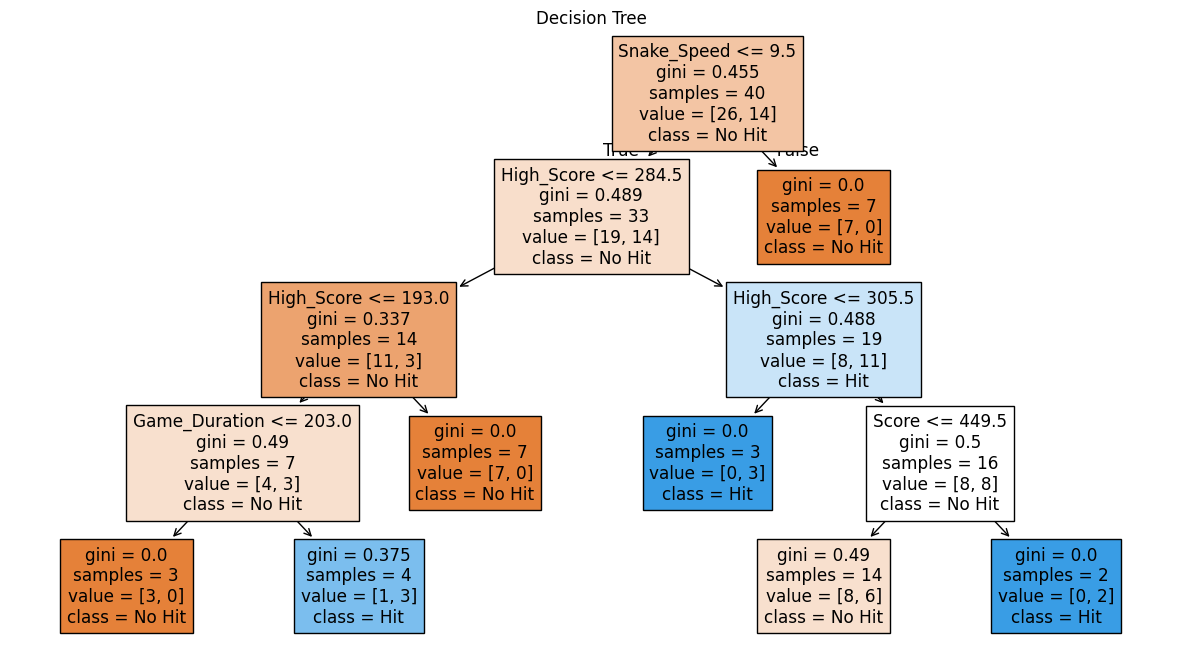

In [ ]:
# 🌲 Step 5: Decision Tree Prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features = ['Score', 'High_Score', 'Game_Duration', 'Snake_Speed']
X = df[features]
y = df['Hit_Border']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=features, class_names=['No Hit', 'Hit'], filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
# 🤖 Step 6: Automated Design Insights
# Ensure pandas is imported if it wasn't in a previous cell that was run
import pandas as pd

# Assume df has been loaded in a previous step, if not, you need to load it here
# For example:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(next(iter(uploaded)))

hit_rate = df['Hit_Border'].mean()
avg_duration = df.groupby('Hit_Border')['Game_Duration'].mean()

print("🔍 Automated Insights:")
if hit_rate > 0.5:
    print(f"- More than 50% of players lose by hitting the border ({hit_rate:.2%})")
if avg_duration[1] < avg_duration[0]:
    print(f"- Players who hit the border play shorter ({avg_duration[1]:.1f}s) than others ({avg_duration[0]:.1f}s)")
if df['Score'].mean() < 150:
    print("- Average score is low. Consider reducing difficulty.")

🔍 Automated Insights:
